<a href="https://colab.research.google.com/github/laurencefrank/Applied-Text-Mining/blob/main/ATM_P2_Monday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applied Text Mining, Utrecht Summerschool 26 - 29 July 2021

Monday 26 July, practical 2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [6]:
bookrev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AppliedTextMiningSummerschoolUtrechtJuly2021/book_reviews.csv')


In [7]:
bookrev.head()

,rating_no,Unnamed: 1,id,age_category,book_genre,rating_no.1,tokenised_text,n_tokens
0,1.0,284434,review_244526687,Adult,Popular fiction - general,1.0,like adult book concept simply ya spoiler exam...,30
1,1.0,30788,review_528067373,Adult,Literary fiction,1.0,okay read college maybe little biased rating l...,21
2,1.0,84989,review_3210428778,Adult,Literary fiction,1.0,remember read book club hating probably chance...,18
3,1.0,61511,review_112612281,Adult,Literary fiction,1.0,yeah star cause know like make like plus depre...,13
4,1.0,112948,review_380001099,Adult,Literary fiction,1.0,assign book brit lit class read email teacher ...,22


In [30]:
cols = bookrev.columns
print(cols)

Index(['rating_no', 'Unnamed: 1', 'id', 'age_category', 'book_genre',
       'rating_no.1', 'tokenised_text', 'n_tokens'],
      dtype='object')


In [8]:
bookrev.shape

(10000, 8)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


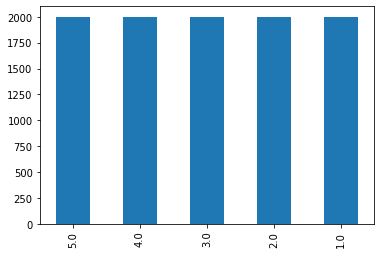

In [13]:
bookrev['rating_no'].value_counts().sort_values().plot(kind = 'bar')

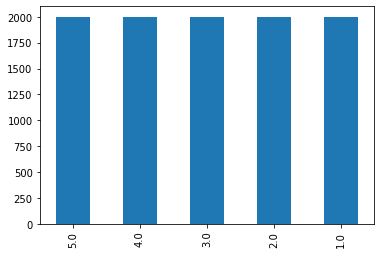

In [16]:
bookrev['rating_no.1'].value_counts().sort_values().plot(kind = 'bar')

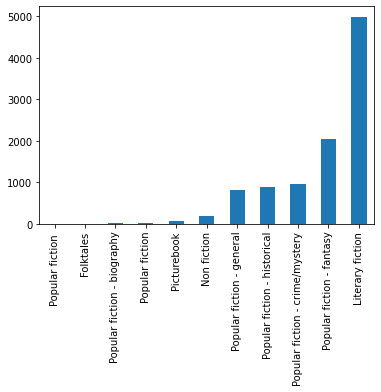

In [14]:
bookrev['book_genre'].value_counts().sort_values().plot(kind = 'bar')

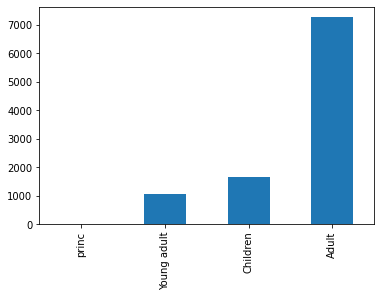

In [15]:
bookrev['age_category'].value_counts().sort_values().plot(kind = 'bar')

Now you can construct the document-term matrix. The [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class counts how often each word occurs in each document. Optionally, you can also pass ngram_range as a parameter, to see if combinations of multiple words are better predictors for ratings. Define the output of the `fit_transform function` on 'tokenised_text' as your feature matrix X, and the star ratings ('rating_no') as the variable y you're trying to predict.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(bookrev['tokenised_text'])
y = data['rating_no']

To inspect the words in the document-term matrix, you can call `get_feature_names()` on the vectorizer.

In [21]:
words = vectorizer.get_feature_names()
print(words[:20])

['aa', 'aaaaaaa', 'aaaaaaaahhhhh', 'aaaaah', 'aaaaand', 'aaaahhhhh', 'aaack', 'aaah', 'aaarrrgggh', 'aagggh', 'aaj', 'ab', 'aback', 'abacus', 'abandon', 'abandone', 'abandoned', 'abandonment', 'abasement', 'abasment']


In [26]:
type(vectorizer)

sklearn.feature_extraction.text.CountVectorizer

In [25]:
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


Alternatively, you could also use a [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer): this class counts how often a word occurs in a document and weighs it against how often the word occurs in the whole corpus. This is a way to eliminate words that are frequent but not very meaningful. You can play around with different vectorizers to see how they affect your results.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(bookrev['tokenised_text'])
y2 = bookrev['rating_no']

After defining your document-term matrix, you can split the data into train- and test sets. Note that `random_state` is used so that the split will be the same for everyone in the group, such that different random selections don't cause slightly different results.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=10)
model2 = knn.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=100)
model3 = knn.fit(X_train, y_train)
print('accuracy with 3 neighbours:', model.score(X_test, y_test),
      '\naccuracy with 10 neighbours:', model2.score(X_test, y_test), 
      '\naccuracy with 100 neighbours:', model3.score(X_test, y_test))

acc = model.score(X_test, y_test)
print(acc)

accuracy with 3 neighbours: 0.27545454545454545 
accuracy with 10 neighbours: 0.27545454545454545 
accuracy with 100 neighbours: 0.2918181818181818
0.27545454545454545


In [48]:
# Import classificatin models from sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

SEED = 42

In [51]:
# prepare empty lists for the metrics. These lists will be the columns in a dataframe presenting the results.
Accuracy = []

# prepare a list of machine learning models.
models = [KNeighborsClassifier(n_neighbors=10), MultinomialNB(alpha=1), LinearSVC(C=1.0), DecisionTreeClassifier(max_depth=5),  RandomForestClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15, random_state = SEED)]
#models = [KNeighborsClassifier(n_neighbors=10), MultinomialNB(alpha=1), LinearSVC(C=1.0), DecisionTreeClassifier(max_depth=5),  RandomForestClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15, random_state = SEED), GradientBoostingClassifier(n_estimators=1000, min_samples_split=30, min_samples_leaf=15, random_state = SEED)]

# prepare a list with the names of the machine learning models for the dataframe with the results
classifiers = ['KNN', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest']
#classifiers = ['KNN', 'Naive Bayes', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

In [52]:
# A for loop to fit all the models defined in the previous step and to present the results in a dataframe.

for i in models:
    model = i
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)


    Accuracy.append(acc)
    # the following lines of code are not very efficient, but they work. I am sure
    # this can be done in a much more clever and efficient way, but I do not know how.

dataframe = pd.DataFrame(
{'Accuracy': Accuracy}, index=classifiers)

dataframe

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Accuracy
KNN,0.275455
Naive Bayes,0.400000
SVC,0.361212
Decision Tree,0.268788
Random Forest,0.403333


## Sentiment analysis with transformers library

Optional: test sentiment analysis with the [transformers library](https://huggingface.co/transformers/quicktour.html).

a. Install transformers library. This takes a while.

In [53]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 41.3 MB/s 
     |████████████████████████████████| 3.3 MB 42.3 MB/s 
     |████████████████████████████████| 636 kB 41.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Download and use the "nlptown/bert-base-multilingual-uncased-sentiment" model from nlptown, apply it to the first 100 rows of the data (this also takes a while).

In [54]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

out_df = pd.DataFrame()
for i, row in bookrev.head(100).iterrows():
  prediction = classifier(row['tokenised_text'][:512])
  label = int(prediction[0]['label'].split(' ')[0])
  df = pd.DataFrame({'predicted_rating': [label],
                    'star_rating': [int(row['rating_no'])]})
  out_df = out_df.append(df, ignore_index=True)

In [55]:
print('percentage correct predictions:', len(out_df[out_df['predicted_rating']==out_df['star_rating']])/100)

percentage correct predictions: 0.74


In [58]:
out_df.head()

,predicted_rating,star_rating
0,3,1
1,3,1
2,4,1
3,1,1
4,1,1


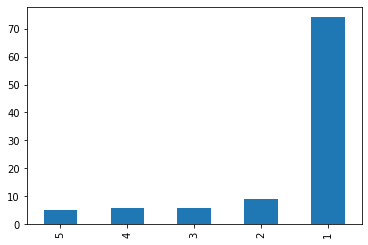

In [60]:
out_df['predicted_rating'].value_counts().sort_values().plot(kind = 'bar')

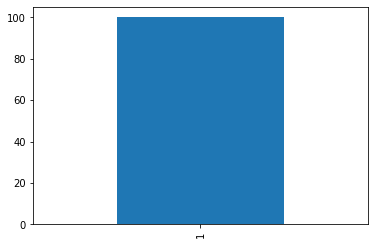

In [61]:
out_df['star_rating'].value_counts().sort_values().plot(kind = 'bar')

In [59]:
import statsmodels.api as sm

table = pd.crosstab(out_df['star_rating'], out_df['predicted_rating'])
table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


predicted_rating,1,2,3,4,5
star_rating,,,,,
1,74,9,6,6,5


In [63]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

out_df = pd.DataFrame()
for i, row in bookrev.sample(100).iterrows():
  prediction = classifier(row['tokenised_text'][:512])
  label = int(prediction[0]['label'].split(' ')[0])
  df = pd.DataFrame({'predicted_rating': [label],
                    'star_rating': [int(row['rating_no'])]})
  out_df = out_df.append(df, ignore_index=True)

In [64]:
table = pd.crosstab(out_df['star_rating'], out_df['predicted_rating'])
table

predicted_rating,1,2,3,4,5
star_rating,,,,,
1,7,4,2,4,1
2,9,3,4,2,4
3,5,2,6,5,2
4,7,2,3,7,4
5,7,0,0,1,9


In [65]:
print('percentage correct predictions:', len(out_df[out_df['predicted_rating']==out_df['star_rating']])/100)

percentage correct predictions: 0.32
